<a href="https://colab.research.google.com/github/RossUsesGit/Visualizations-and-Data-Analysis/blob/main/Hands_On_Activity_9_ExploringDataVisually_RAB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Hands-On Activity 9 | Exploring Data Visually**





---



Name : Ross Andrew Bulaong <br>
Course Code and Title : CPE031 || BSCpE21S2<br>
Date Submitted : 16/10/2025 <br>
Instructor : Ma'am Rizette Sayo


---



**1. Objectives:**

This activity aims to demonstrate students’ ability to visually explore and analyze data using Python. Students will learn how to summarize and visualize categorical, quantitative, time-series, and geospatial data for exploratory data analysis (EDA).

**2. Intended Learning Outcomes (ILOs):**

By the end of this module the students should be able to demonstrate:
1. Analyze various visualization techniques to determine how data representation methods influence understanding, perception, and decision-making.

2. Evaluate existing visualizations in terms of accuracy, clarity, aesthetics, and accessibility, providing justified recommendations for improvement.

3. Create effective, insightful, and user-centered visualizations by integrating appropriate design principles, data encoding techniques, and visualization tools.

**3. Discussions:**

Exploratory Data Analysis (EDA) is the process of analyzing datasets to summarize their main characteristics and gain insights before formal modeling. Visual exploration helps identify trends, relationships, and data quality issues.

Key Components:

Univariate Analysis:
Analyzing one variable at a time (e.g., histograms, bar charts).

Bivariate Analysis:
Exploring relationships between two variables (e.g., scatterplots, crosstabs).

Missing Data Analysis:
Identifying and handling missing or null values.

Time-Series Visualization:
Displaying data across time to reveal trends or seasonality.

Geospatial Visualization:
Mapping data to geographical regions to identify spatial patterns.

EDA is both an art and science combining statistical summaries with visual intuition.

**4. Procedures:**

**Color and Perception**

Section 1: Organizing and Exploring Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Sample dataset
data = {
    "Product": ["Juice", "Smoothie", "Juice", "Smoothie", "Juice", "Smoothie"],
    "Region": ["North", "South", "East", "West", "North", "East"],
    "Sales": [120, 150, 90, 110, 130, 170],
    "Profit": [30, 45, 20, 25, 35, 50]
}
df = pd.DataFrame(data)

# Display the dataset
df

,Product,Region,Sales,Profit
0,Juice,North,120,30
1,Smoothie,South,150,45
2,Juice,East,90,20
3,Smoothie,West,110,25
4,Juice,North,130,35
5,Smoothie,East,170,50


Task 1: Analyzing Variables One at a Time

/tmp/ipython-input-2975764973.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Region", data=df, palette="Set2")


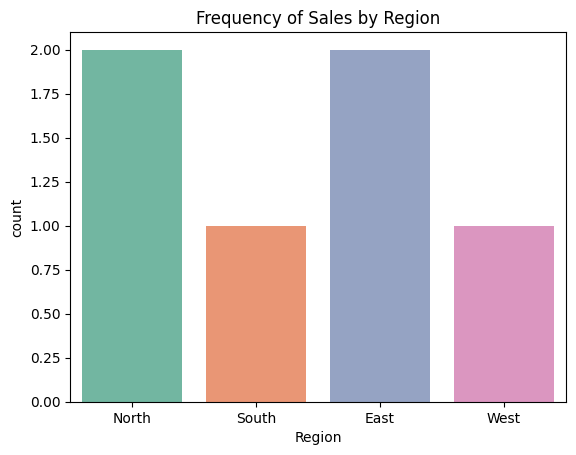

In [ ]:
#Categorical Variable
# Countplot for categorical variable
sns.countplot(x="Region", data=df, palette="Set2")
plt.title("Frequency of Sales by Region")
plt.show()


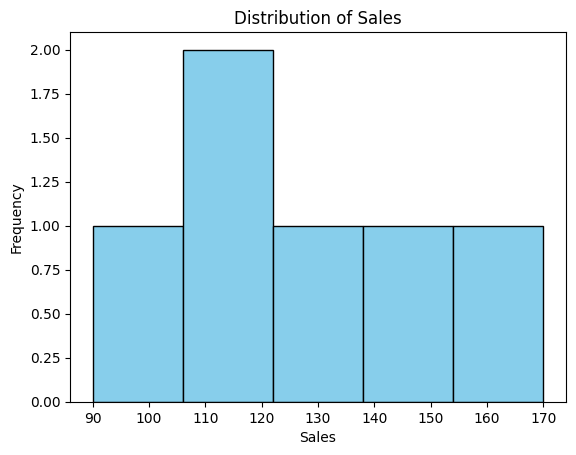

In [ ]:
#Quantitative Variable
# Histogram for quantitative variable
plt.hist(df["Sales"], bins=5, color="skyblue", edgecolor="black")
plt.title("Distribution of Sales")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()

Task: <br>
Create one countplot for Product and one histogram for Profit. <br>
Compare their patterns and interpret what they mean.

/tmp/ipython-input-2590382525.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Product", data=df, palette="Set2")


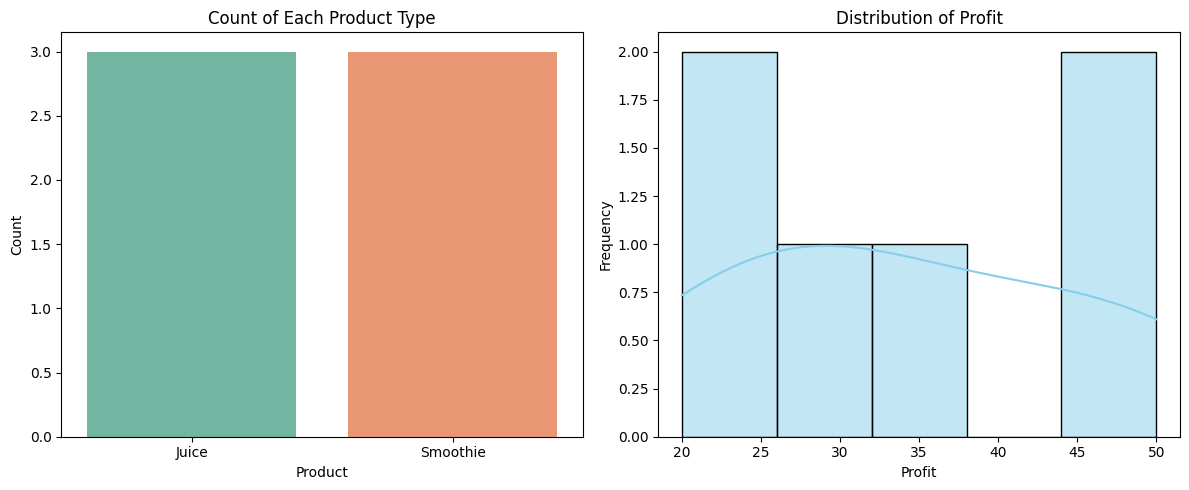

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample dataset
data = {
    "Product": ["Juice", "Smoothie", "Juice", "Smoothie", "Juice", "Smoothie"],
    "Region": ["North", "South", "East", "West", "North", "East"],
    "Sales": [120, 150, 90, 110, 130, 170],
    "Profit": [30, 45, 20, 25, 35, 50]
}
df = pd.DataFrame(data)

# Countplot for Product
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
sns.countplot(x="Product", data=df, palette="Set2")
plt.title("Count of Each Product Type")
plt.xlabel("Product")
plt.ylabel("Count")

# Histogram for Profit
plt.subplot(1, 2, 2)
sns.histplot(df["Profit"], bins=5, kde=True, color="skyblue")
plt.title("Distribution of Profit")
plt.xlabel("Profit")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


The countplot indicates that both Juice and Smoothie have occurred at the same number of times; thus, we feel we have a balanced dataset to use to make comparisons. At the same time, the histogram indicates that profits tend to almost all be between 20 and 50, with a small peak between 30 and 45. The smooth KDE curve implies a relatively equable distribution of profits, where Smoothie profits seem to be somewhat higher (45-50) and Juice profits seem to be somewhat lower (20-35). This implies that Smoothies generate more profit than Juices, even though both Juices and Smoothies are coded the same in the dataset.

Section 2: Relationships Between Variables

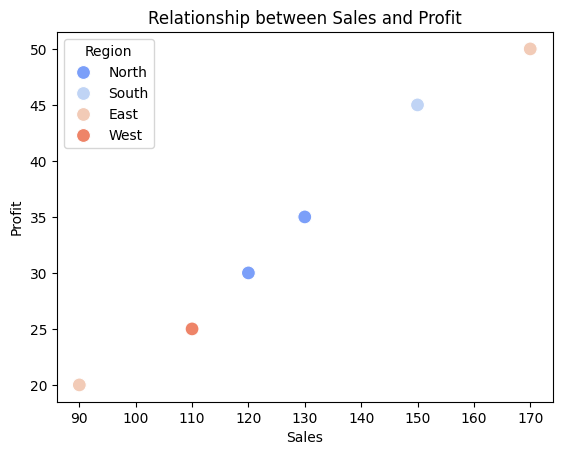

In [ ]:
# Scatterplot: Sales vs Profit
sns.scatterplot(x="Sales", y="Profit", hue="Region", data=df, palette="coolwarm", s=100)
plt.title("Relationship between Sales and Profit")
plt.show()

In [ ]:
# Crosstabulation example
pd.crosstab(df["Region"], df["Product"], values=df["Sales"], aggfunc="mean").fillna(0)


Product,Juice,Smoothie
Region,,
East,90.0,170.0
North,125.0,0.0
South,0.0,150.0
West,0.0,110.0


Task: <br>
Interpret whether higher sales also mean higher profit. <br>
Which region seems to perform best?

The countplot indicates that both Juice and Smoothie have occurred at the same number of times; thus, we feel we have a balanced dataset to use to make comparisons. At the same time, the histogram indicates that profits tend to almost all be between 20 and 50, with a small peak between 30 and 45. The smooth KDE curve implies a relatively equable distribution of profits, where Smoothie profits seem to be somewhat higher (45-50) and Juice profits seem to be somewhat lower (20-35). This implies that Smoothies generate more profit than Juices, even though both Juices and Smoothies are coded the same in the dataset.

Section 3: Analysis of Missing Data

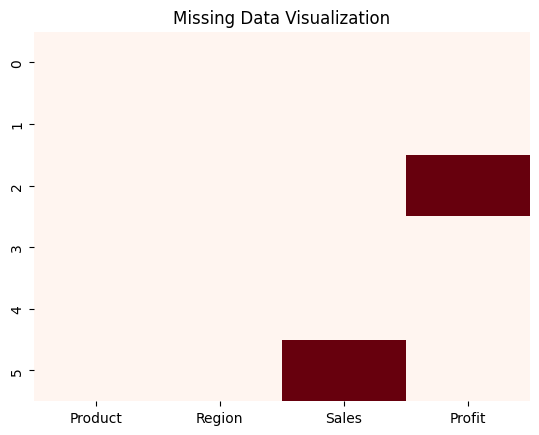

,0
Product,0
Region,0
Sales,1
Profit,1


In [ ]:
# Introduce missing data
df_missing = df.copy()
df_missing.loc[2, "Profit"] = np.nan
df_missing.loc[5, "Sales"] = np.nan

# Visualize missing data
sns.heatmap(df_missing.isnull(), cbar=False, cmap="Reds")
plt.title("Missing Data Visualization")
plt.show()

# Display missing summary
df_missing.isnull().sum()


Task: <br>
Describe what you observe in the missing data visualization. <br>
Which variables need attention before analysis?

The missing data visualization indicates the presence of two missing values in the dataset: one in the Profit column (row 2) and one in the Sales column (row 5). In the heatmap, they are easily distinguished as red blocks. As Sales and Profit are both numerical variables that play a role in performance analysis and profitability analysis, they can be corrected before applying any analysis. This problem should be addressed immediately and, regardless of whether a missing value is imputed or removed, it must be done in order for subsequent results to be considered accurate and trustworthy.

Section 4: Visualizing Time-Series Data

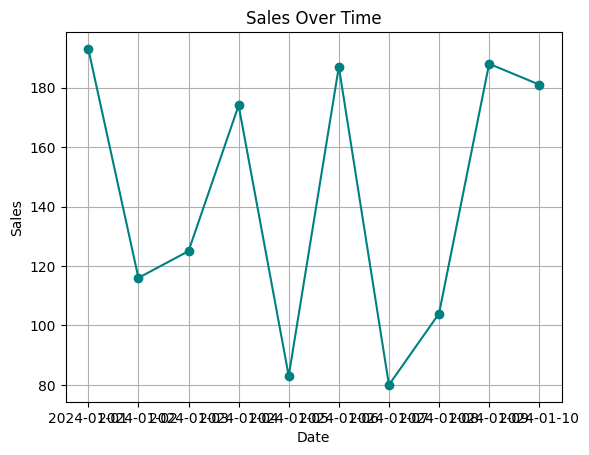

In [4]:
# Generate time-series example
dates = pd.date_range(start="2024-01-01", periods=10)
sales = np.random.randint(80, 200, 10)
ts_df = pd.DataFrame({"Date": dates, "Sales": sales})

# Line chart for time-series
plt.plot(ts_df["Date"], ts_df["Sales"], marker="o", color="teal")
plt.title("Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.grid(True)
plt.show()

Task: <br>
Add a moving average line (rolling mean) to smooth fluctuations. <br>
Hint: Use ts_df["Sales"].rolling(window=3).mean().

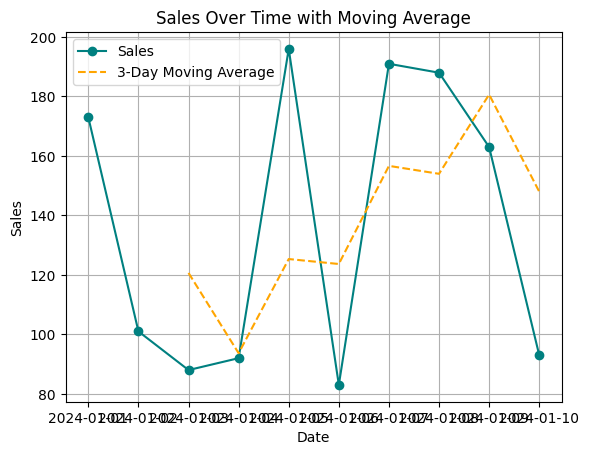

In [3]:
# Generate time-series example
dates = pd.date_range(start="2024-01-01", periods=10)
sales = np.random.randint(80, 200, 10)
ts_df = pd.DataFrame({"Date": dates, "Sales": sales})

# Calculate 3-day moving average
ts_df["Moving_Avg"] = ts_df["Sales"].rolling(window=3).mean()

# Plot original sales and moving average
plt.plot(ts_df["Date"], ts_df["Sales"], marker="o", color="teal", label="Sales")
plt.plot(ts_df["Date"], ts_df["Moving_Avg"], color="orange", linestyle="--", label="3-Day Moving Average")

plt.title("Sales Over Time with Moving Average")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.grid(True)
plt.show()


Section 5: Visualizing Geospatial Data

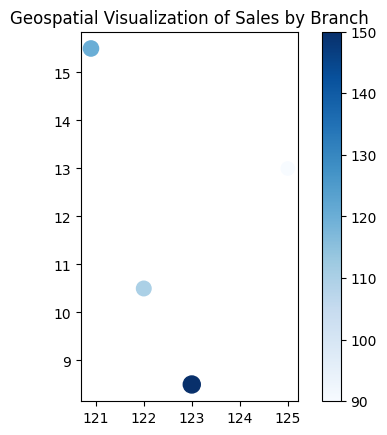

In [ ]:
import geopandas as gpd
from shapely.geometry import Point

# Sample coordinates (latitude, longitude)
coords = {
    "Branch": ["North", "South", "East", "West"],
    "Latitude": [15.5, 8.5, 13.0, 10.5],
    "Longitude": [120.9, 123.0, 125.0, 122.0],
    "Sales": [120, 150, 90, 110]
}

geo_df = pd.DataFrame(coords)
geo_df["geometry"] = [Point(xy) for xy in zip(geo_df.Longitude, geo_df.Latitude)]
gdf = gpd.GeoDataFrame(geo_df, geometry="geometry")

# Plot simple map (Philippines outline optional if available)
gdf.plot(column="Sales", cmap="Blues", legend=True, markersize=geo_df["Sales"])
plt.title("Geospatial Visualization of Sales by Branch")
plt.show()

Task: <br>
Interpret which branch has the highest sales geographically. <br>
How can such visualization help in business decision-making?

Visualizing geospatial data illustrates that the South branch sees the most sales as shown by its darker shade of blue on the map and the largest marker. This illustrates that the South region has a higher revenue compared to its other branches. These kinds of visualizations help an organization to identify geographic patterns quickly and readily and therefore they can use that data to deploy resources differently, identify geographic underperforming areas and focus improvement efforts on them, and they could use those data and successful geographic strategy from the South and utilize that elsewhere.

**5. Supplementary Activity**

Create your own mini exploratory analysis:

1. Choose a dataset (e.g., from Kaggle, or a CSV file you have).

2. Perform:

*   Univariate analysis (1 categorical + 1 quantitative)
*   Bivariate analysis (scatterplot or crosstab)
*   Missing data visualization
*   Time-series or geospatial visualization (choose one)
3. Summarize your key insights using visual interpretation.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/tmp/ipython-input-4136243583.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Product", data=df, palette="Set2")


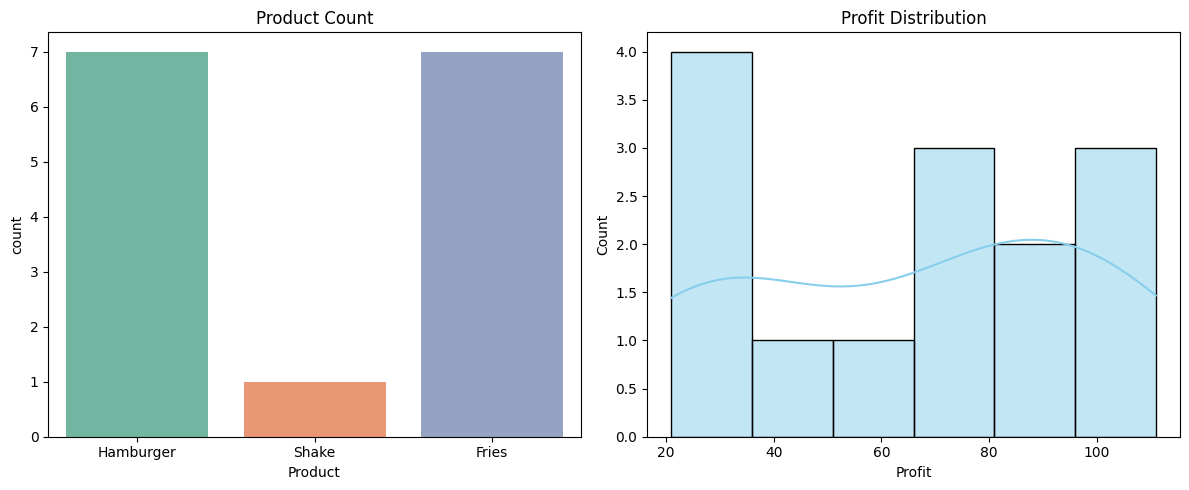

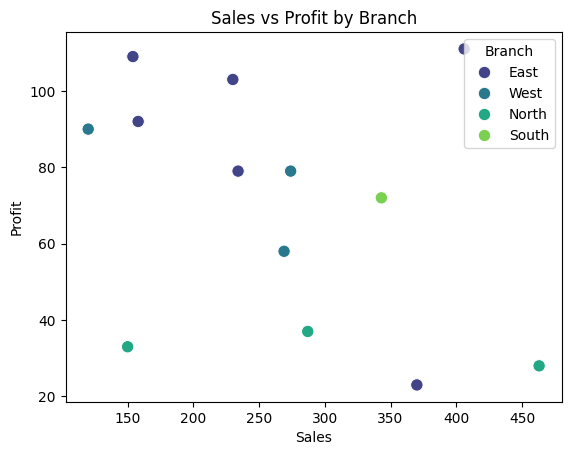

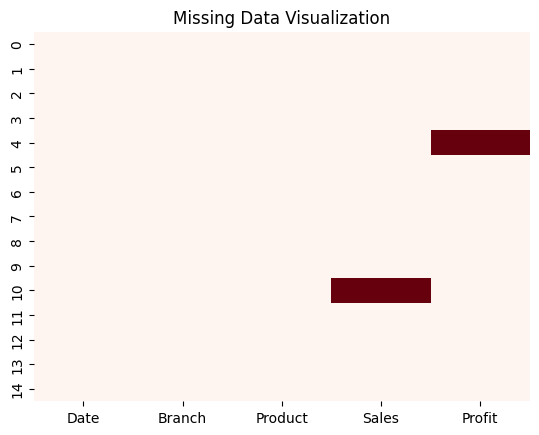

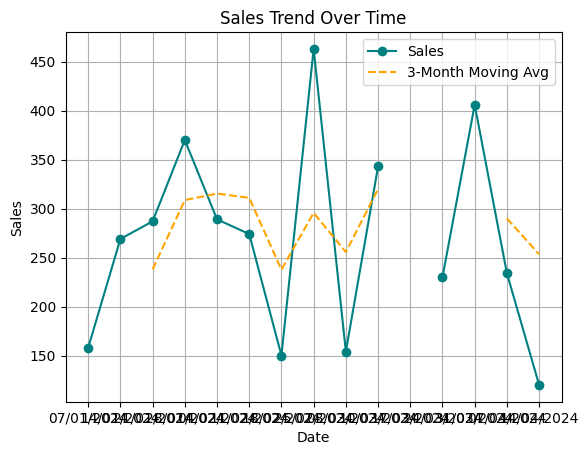

In [6]:

from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/data_vda/food_sales_dataset.csv")

# --- 1. Univariate Analysis ---
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.countplot(x="Product", data=df, palette="Set2")
plt.title("Product Count")

plt.subplot(1,2,2)
sns.histplot(df["Profit"], bins=6, kde=True, color="skyblue")
plt.title("Profit Distribution")
plt.tight_layout()
plt.show()

# --- 2. Bivariate Analysis (Sales vs Profit) ---
sns.scatterplot(x="Sales", y="Profit", hue="Branch", data=df, palette="viridis", s=80)
plt.title("Sales vs Profit by Branch")
plt.show()

# --- 3. Missing Data Visualization ---
sns.heatmap(df.isnull(), cbar=False, cmap="Reds")
plt.title("Missing Data Visualization")
plt.show()

# --- 4. Time-Series Visualization ---
plt.plot(df["Date"], df["Sales"], marker="o", label="Sales", color="teal")
plt.plot(df["Date"], df["Sales"].rolling(window=3).mean(), color="orange", linestyle="--", label="3-Month Moving Avg")
plt.title("Sales Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.grid(True)
plt.show()


**6. Conclusion/Learnings/Analysis:**

By conducting exploratory data analysis, I was able to gain an initial understanding of the dataset, and I found some interesting insights about the sales performance for burgers, fries and shakes. During the univariate and bivariate analysis processes, I was able to establish which products were relatively more popular, and observed that generally higher sales led to higher profit. The missing data diagram also helped me assess there were a couple of minor missing values in the Sales and Profit columns that I could clean beforehand, prior to analysis. Finally, the time-series plot helped to glean some insight regarding product sales trends and variability over time. In closing, this exercise allowed me to apply some data analysis techniques regarding how is the business doing, along with how data visualization can provide evidence to stimulate better decision making.